# WHAT ARE THE MOST USED APPLICATIONS AND WHY ?

In their **daily activities**, individuals used to use some mobile, web as well as desktop applications. The fact is that they tend to use some more than others. 

Here, I found on Kaggle, a dataset that contains some data about people and their usage rate of some common applications. 

### Let's do a quick Exploratory Data Analysis to see what conclusions can be drawn: 
  
1. Which applications are completely free ?
2. How much does the most expensive application cost ?
3. Which application received the most important number of reviews ?
4. What are the best rated applications ?

## Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Display the content of the dataset

In [2]:
common_apps_data = pd.read_csv("./common_apps.csv")
common_apps_data

,App_Order,App_Name,App_Star,App_Price,App_Review
0,0,iTunes,3.0,Free,30874.0
1,1,Netflix,4.0,Free,671575.0
2,2,Spotify Music,4.0,Free,31093.0
3,3,Microsoft Sticky Notes,4.5,Free,90236.0
4,4,Facebook,3.5,Free,481943.0
...,...,...,...,...,...
992,992,HP System Information,3.5,Free,21.0
993,993,Any Sound Recorder: audio recorder &amp; voice...,4.0,Free,173.0
994,994,Kiddo Smart!,4.5,Free,524.0
995,995,TowMagic,NaN,Free,NaN


According to the display dataset, it can obviously be seen that all the data are not shown. 

## Display the whole dataset
There is a lot of records in the dataset so it will be kind of very long displaying as it contains 997 rows.

In [3]:
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', 5)
# common_apps_data

## How many records exist in the dataset (number of lines and columns) ?

In [4]:
common_apps_data.shape

(997, 5)

The data contains 997 rows and 5 columns. Quite a large dataset but let's see if all the records (lines and columns) are present.

## What are the different columns of the dataset ?

In [5]:
common_apps_data.columns.tolist()

['App_Order', 'App_Name', 'App_Star', 'App_Price', 'App_Review']

So these 5 elements represent the different columns of the dataset. In the order, lets'name : 
- **App_Order** for the order of the applications in the dataset
- **App_Name** for the names of the applications
- **App_Star** for the application rating stars
- **App_Price** for the applications prices and 
- **App_Review** for the different reviews made on the applications.

In [6]:
common_apps_data.describe()

,App_Order,App_Star,App_Review
count,997.000000,972.000000,972.000000
mean,498.000000,3.819959,12146.978395
std,287.953411,0.815651,44772.828384
min,0.000000,1.000000,1.000000
25%,249.000000,3.500000,123.000000
50%,498.000000,4.000000,781.000000
75%,747.000000,4.500000,5290.000000
max,996.000000,5.000000,671575.000000


# Data Cleaning

In [7]:
common_apps_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997 entries, 0 to 996
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   App_Order   997 non-null    int64  
 1   App_Name    997 non-null    object 
 2   App_Star    972 non-null    float64
 3   App_Price   997 non-null    object 
 4   App_Review  972 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 39.1+ KB


It can obviously be seen that 2 columns among the 5 have some null values. This should be corrected for a better accuracy.

In [8]:
common_apps_data.isnull()

,App_Order,App_Name,App_Star,App_Price,App_Review
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
992,False,False,False,False,False
993,False,False,False,False,False
994,False,False,False,False,False
995,False,False,True,False,True


## Counting the missing values in each column

In [9]:
common_apps_data.isnull().sum()

App_Order      0
App_Name       0
App_Star      25
App_Price      0
App_Review    25
dtype: int64

25 records are null both in App_Star and App_Review columns.

## Checking for possible outliers

In [10]:
common_apps_data[common_apps_data["App_Star"] >5]

,App_Order,App_Name,App_Star,App_Price,App_Review


According to the result, no application has a rate higher than 5, meaning that there is no outlier for this column.

In [36]:
common_apps_data[common_apps_data["App_Review"] ==0]

,App_Order,App_Name,App_Star,App_Price,App_Review


All the applications have been reviewed at least once.

## Removing columns that are 90% empty

In [11]:
threshold = len(common_apps_data)*0.1  #10% of the total number of records
threshold

99.7

In [12]:
common_apps_data.dropna(thresh=threshold, axis=1, inplace=True)

In [13]:
common_apps_data.shape

(997, 5)

Apparently, no column is empty at 90% in the dataset. Anyway, let's fill the null values.

## Data Imputation and Manipulation

In [14]:
#Define a function impute_mean
def impute_mean(series):
    return series.fillna(series.mean())


In [15]:
common_apps_data.App_Review = common_apps_data['App_Review'].transform(impute_mean)
common_apps_data.App_Star = common_apps_data['App_Star'].transform(impute_mean)

In [16]:
common_apps_data.isnull().sum()

App_Order     0
App_Name      0
App_Star      0
App_Price     0
App_Review    0
dtype: int64

There is no more null data in the dataset so let's proceed to the next stage.

In [ ]:
It is possible to have some values been repeated. What about displaying per columnn the number of records that are unique.

In [43]:
common_apps_data.nunique()

App_Order     997
App_Name      906
App_Star       10
App_Price       2
App_Review    690
dtype: int64

This is comprehensible for the columns "App_Order", "App_Star", "App_Price" and "App_Review". But concerning the "App_Name" column, 906 are unique, which means that the 91 remaining have been repeated. 

In [46]:
common_apps_data["App_Name"].unique().tolist()

['iTunes',
 'Netflix',
 'Spotify Music',
 'Microsoft Sticky Notes',
 'Facebook',
 'Instagram',
 'Hulu',
 'Messenger',
 'Your Phone',
 'OneNote',
 'WhatsApp Desktop',
 'Norton Safe Web',
 'Slack',
 'NVIDIA Control Panel',
 'Xbox (Beta)',
 'iCloud',
 'Snip &amp; Sketch',
 'Pandora',
 'Grammarly for Microsoft Edge',
 'Microsoft To Do: Lists, Tasks &amp; Reminders',
 'Paint 3D',
 'Any Player - Video, DVD',
 'Adobe Photoshop Express: Image Editor, Adjustments, Filters, Effects, Borders',
 'Trio Office: Word, Slide, Spreadsheet &amp; PDF Compatible',
 'Cool File Viewer: Rar, Word, PDF, PPT, Video &amp; Image Opener',
 'Honey',
 'VLC',
 'PDF Reader - View, Edit, Share',
 'Pinterest',
 'EasyMail for Gmail',
 'Office',
 'Amazon Music',
 'DTS Sound Unbound',
 'VitalSource Bookshelf',
 'BreeZip: Rar, Zip &amp; 7z Extractor',
 'Power BI Desktop',
 'Hotspot Shield Free VPN',
 'FizzTube - YouTube Player',
 'Telegram Desktop',
 'Alexa',
 'Fitbit',
 'Drawboard PDF - Read, edit, annotate',
 'Dolby Acce

# Now, let's find an answer to the different questions

## 1. Which applications are completely free ?

In [17]:
# pd.set_option('display.max_rows', None)
# This is to show all the records.
free_apps = common_apps_data[common_apps_data["App_Price"]=="Free"]
free_apps

,App_Order,App_Name,App_Star,App_Price,App_Review
0,0,iTunes,3.000000,Free,30874.000000
1,1,Netflix,4.000000,Free,671575.000000
2,2,Spotify Music,4.000000,Free,31093.000000
3,3,Microsoft Sticky Notes,4.500000,Free,90236.000000
4,4,Facebook,3.500000,Free,481943.000000
...,...,...,...,...,...
992,992,HP System Information,3.500000,Free,21.000000
993,993,Any Sound Recorder: audio recorder &amp; voice...,4.000000,Free,173.000000
994,994,Kiddo Smart!,4.500000,Free,524.000000
995,995,TowMagic,3.819959,Free,12146.978395


## Let's count the number of the free applications recorded in the dataset

In [18]:
free_apps.count(axis=0)

App_Order     907
App_Name      907
App_Star      907
App_Price     907
App_Review    907
dtype: int64

According to **all** the columns count, it can be inferred that 907 out of 997, approximately 91% of the applications are used for free. 

### What about the applications that are not free ?

In [19]:
# pd.set_option('display.max_rows', None)
not_free_apps = common_apps_data[common_apps_data["App_Price"]!="Free"]
not_free_apps

,App_Order,App_Name,App_Star,App_Price,App_Review
630,630,Duplicates Cleaner Prime,5.0,$5.29,1845.0
631,631,Video Maker - VideoShow,4.0,$5.29,16755.0
632,632,iThoughts,4.0,$5.29,36.0
633,633,Sketch Board,4.0,$5.29,6333.0
634,634,NetTV Plus,3.0,$5.29,263.0
...,...,...,...,...,...
715,715,Icecream Screen Recorder,2.5,$5.29,5.0
716,716,Fudget: budget planner &amp; personal fice tra...,4.5,$5.29,210.0
717,717,LineWebtoon,4.0,$5.29,388.0
718,718,Explore Excel,3.5,$5.29,1172.0


### Counting the number of applications that are not free (Just to be sure it remains the 90)

In [20]:
not_free_apps.count(axis=0)

App_Order     90
App_Name      90
App_Star      90
App_Price     90
App_Review    90
dtype: int64

Under the **App_Price**, it shows 90, which means that 90 applications are not free.

## 2. How much does the most expensive application cost ?

### Let's convert Price into Numerical Values

In [21]:
not_free_apps.App_Price = not_free_apps['App_Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))

C:\Users\modoukpe\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [22]:
not_free_apps.App_Price = not_free_apps['App_Price'].apply(lambda x: float(x))

In [23]:
not_free_apps.App_Price.max()

5.29

From one of the last analysis, all the applications that are **not free** cost $5.29.

So, when querying the data to find out the price of the most expensive application, it displays 5.29. 

**Conclusion** : More than one applications (90) have the same price ($5.29) which means that there is no single most expensive application. 

## 3. Which application received the most important number of reviews ?

In [24]:
no_of_reviews = common_apps_data["App_Review"].max()
no_of_reviews

671575.0

In [25]:
most_rev_app = common_apps_data[["App_Name","App_Review"]].query("App_Review == 671575.0")
most_rev_app

,App_Name,App_Review
1,Netflix,671575.0


The maximum number of reviews made by users is observed on **Netflix**. 

## 4. What are the best rated applications ?

In [26]:
# pd.set_option('display.max_rows', None)
rated_apps = common_apps_data[["App_Name","App_Star"]].query("App_Star == 5.0")
rated_apps

,App_Name,App_Star
28,Pinterest,5.0
73,PDF X,5.0
87,Beach Time PREMIUM,5.0
155,Beach Glow,5.0
156,Snap Core First,5.0
245,Beach Glow,5.0
246,Snap Core First,5.0
286,OMEN Command Center,5.0
289,Dogs and Cats,5.0
300,Cricut Design Space For Beginners,5.0


In [27]:
rated_apps["App_Name"].count()

55

**55** applications out of 997 have been highly appreciated by the users, probably due to their unique user experience and the communication strategy.

## Data Visualisation

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000210551AE308>,
      dtype=object)

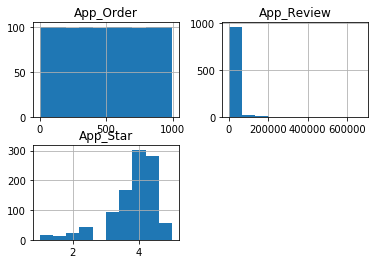

In [28]:
common_apps_data.hist()

**App_Name** and **App_Price** are not displayed because they are not considered as numerical columns.

**App_Price** is not numerical because of the **"Free"** aspect of applications.

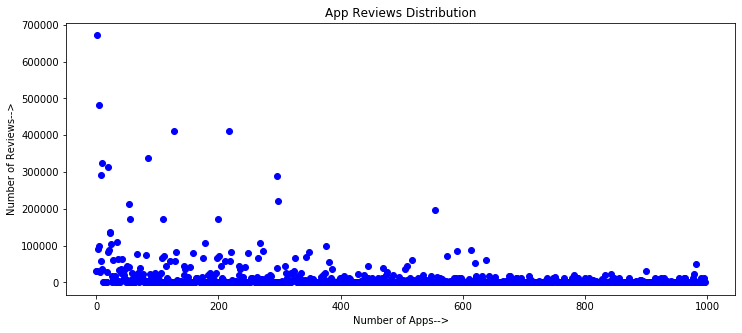

In [29]:
plt.figure(figsize=(12,5))
x= common_apps_data.App_Review.tolist()
plt.plot(x,'ro',color='b')
plt.title('App Reviews Distribution')
plt.xlabel('Number of Apps-->')
plt.ylabel('Number of Reviews-->')
plt.show()

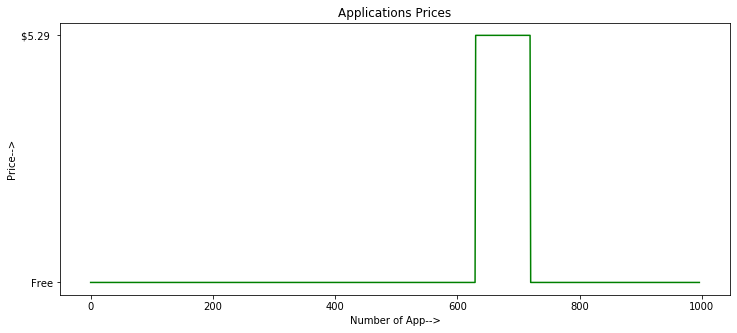

In [30]:
plt.figure(figsize=(12,5))
y= common_apps_data.App_Price.tolist()
plt.plot(y,color='g')
plt.title('Applications Prices')
plt.xlabel('Number of App-->')
plt.ylabel('Price-->')
plt.show()

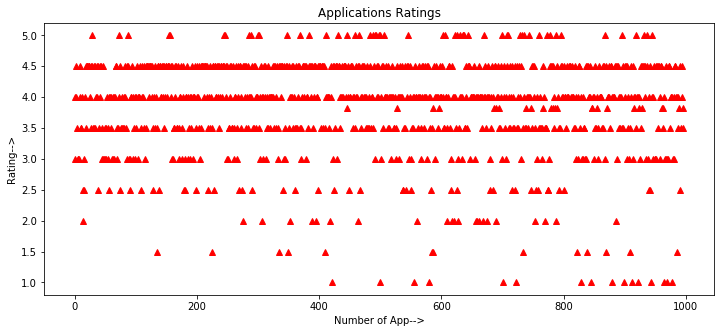

In [31]:
plt.figure(figsize=(12,5))
z= common_apps_data.App_Star.tolist()
plt.plot(z,'g^',color='red')
plt.title('Applications Ratings')
plt.xlabel('Number of App-->')
plt.ylabel('Rating-->')
plt.show()

<BarContainer object of 997 artists>

C:\Users\modoukpe\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 12300 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\modoukpe\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 12301 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\modoukpe\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26377 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\modoukpe\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 36947 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\modoukpe\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 35789 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\modoukpe\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20

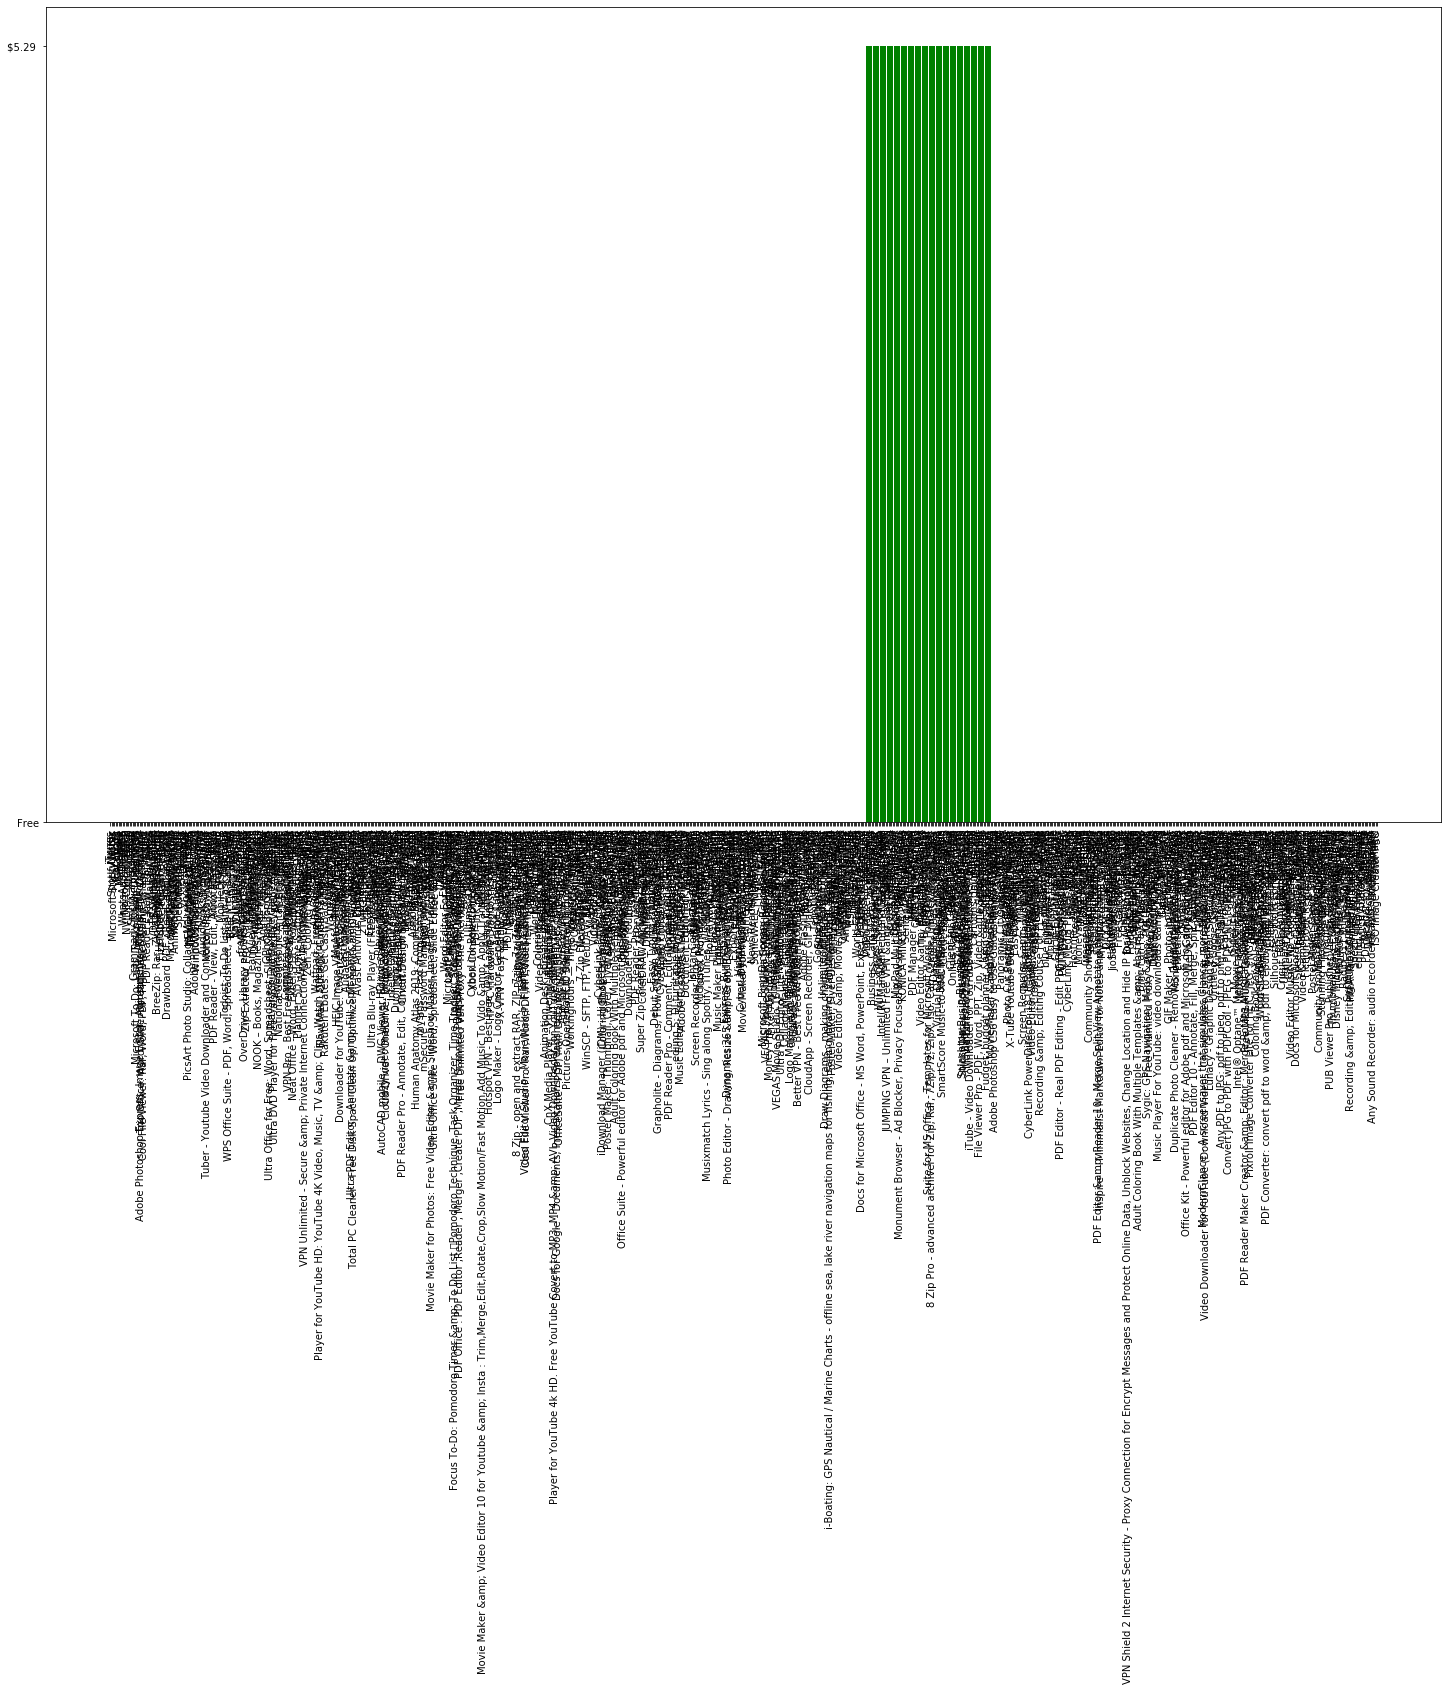

In [32]:
plt.figure(figsize=(25,15))
plt.xticks(rotation=90)
plt.bar(common_apps_data.App_Name,common_apps_data.App_Price, color="g")

Text(0.5, 1.0, 'Reviews per App')

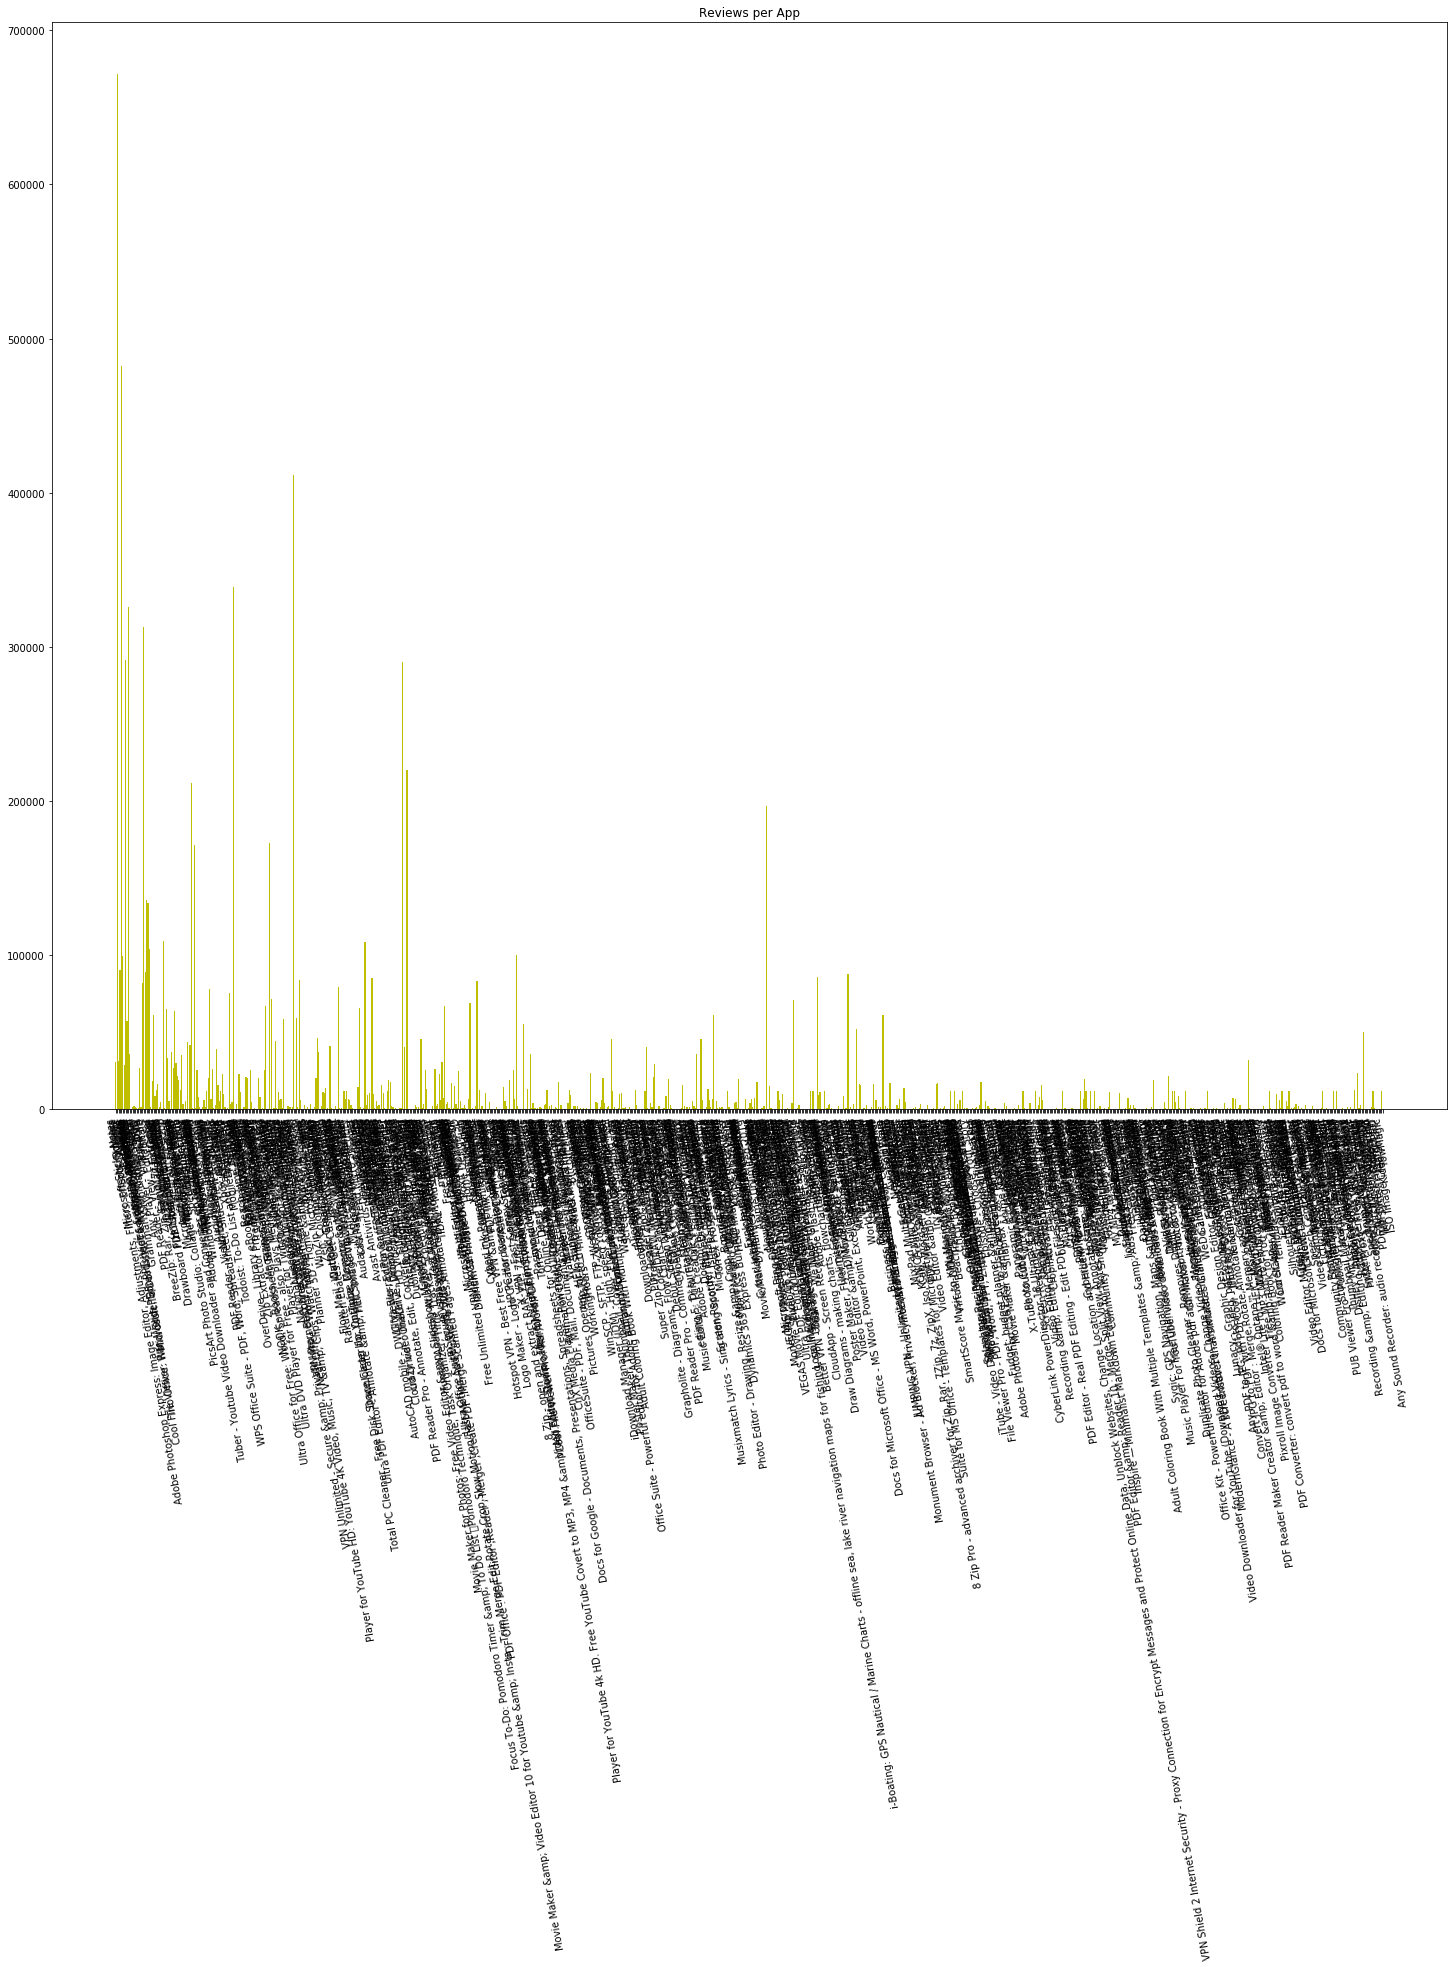

In [33]:
plt.figure(figsize=(25,20))
plt.xticks(rotation=100)
plt.bar(common_apps_data.App_Name,common_apps_data.App_Review, color="y")
plt.title("Reviews per App")

<BarContainer object of 997 artists>

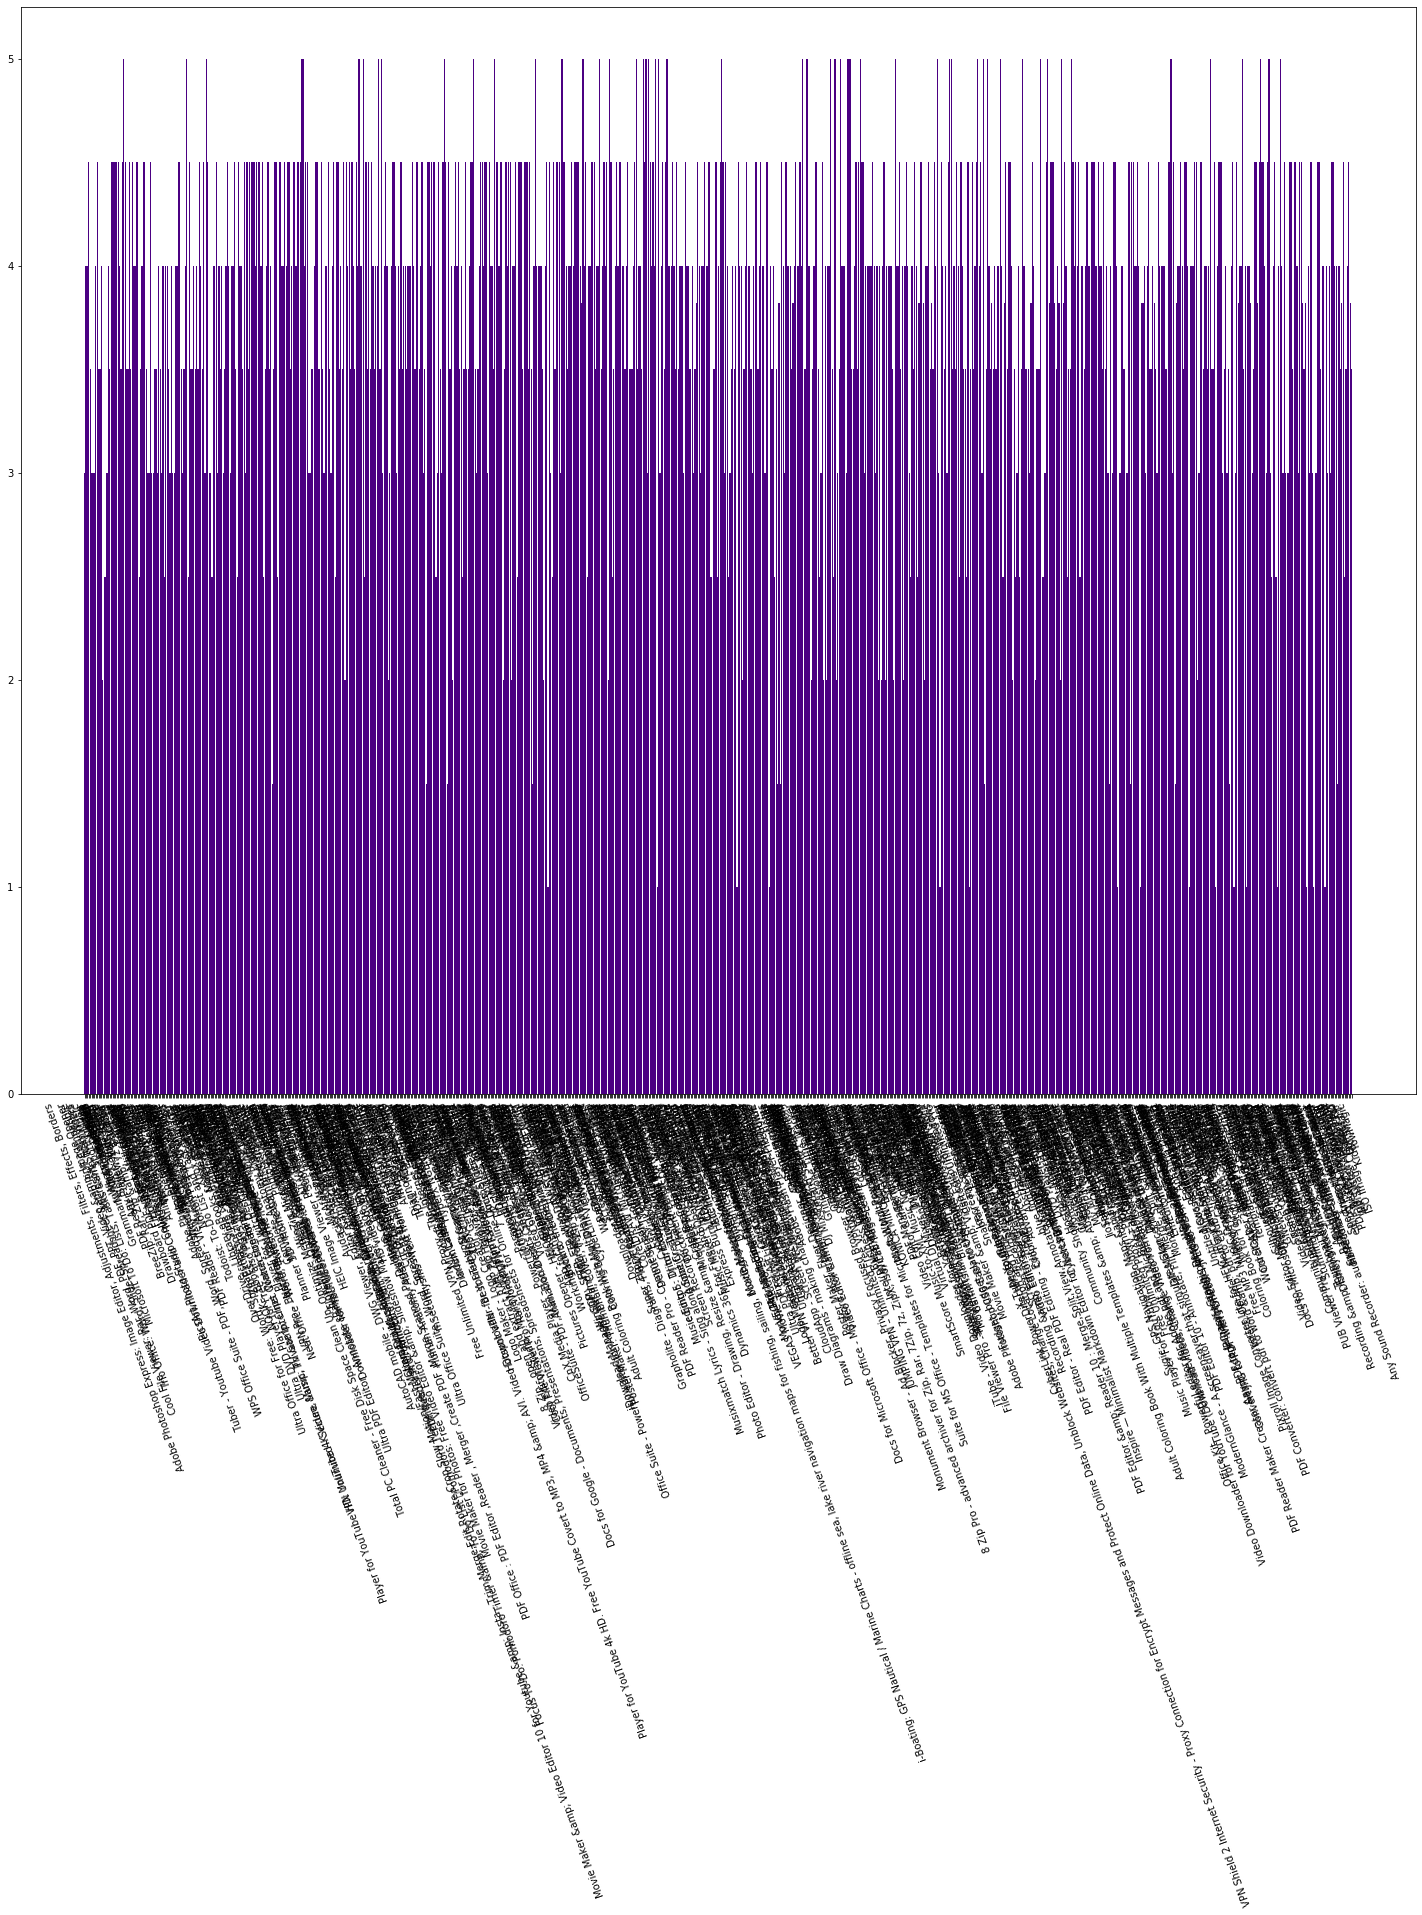

In [34]:
plt.figure(figsize=(25,20))
plt.xticks(rotation=110)
plt.bar(common_apps_data.App_Name,common_apps_data.App_Star, color="indigo")